<table align="left">
  <td>
    <a href="https://colab.research.google.com/github/marco-canas/ml_intro/blob/main/2_planificacion/redes_neuronales_geron/chapter_10/pagina_488_3th_edition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>
  </td>
  <td>
    <a target="_blank" href="https://kaggle.com/kernels/welcome?src=https://github.com/marco-canas/ml_intro/blob/main/2_planificacion/redes_neuronales_geron/chapter_10/pagina_488_3th_edition.ipynb"><img src="https://kaggle.com/static/images/open-in-kaggle.svg" /></a>
  </td>
</table>


# **MLPs para Clasificación**  


Los MLPs también pueden utilizarse para tareas de clasificación. 

# Tipos de clasificación que queremos abordar   

Tipos de clasificación: 

1. Clasificación binaria. 
2. Clasificación multietiqueta. 
3. Clasificación multiclase. 

<img src = 'tipos_de_clasificacion.png'>

En un problema de **clasificación binaria**, solo necesitas una neurona de salida con la función de activación **sigmoide**: su salida será un valor entre 0 y 1, que puedes interpretar como la probabilidad estimada de la clase positiva. 

<img src = "clasificacion_binaria_sigmoid.png" width = 600>

$$ sigmoide(x) = \frac{1}{1 + e^{-x}} $$

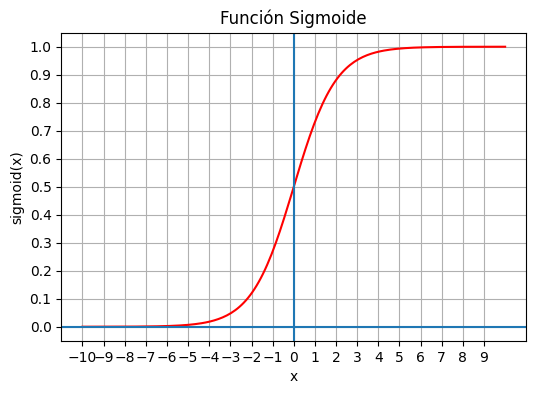

In [1]:
import numpy as np # 

import matplotlib.pyplot as plt

# Definir la función sigmoide
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

x = np.linspace(start = -10, stop = 10, num = 200) # partición regular del intervalo [-10, 10]
y = sigmoid(x)
plt.figure(figsize=(6, 4))
plt.plot(x, y, color = 'red') # gráfico de líneas 
plt.axvline(x = 0) # eje horizontal 
plt.axhline(y = 0) # eje vertical 
plt.title("Función Sigmoide")
plt.xlabel("x")
plt.ylabel("sigmoid(x)")
plt.xticks(np.arange(-10, 10, step = 1)) # metrizar o escalar el eje horizontal 
plt.yticks(np.arange(start = 0, stop = 1 + 0.1, step = 0.1)) # metrizar o escalar el eje vertical 
plt.grid(True)
plt.savefig(r'C:\Users\marco\Downloads\sigmoid_plot.jpg')
plt.show()

La probabilidad de la clase negativa será igual a 1 menos ese valor.  


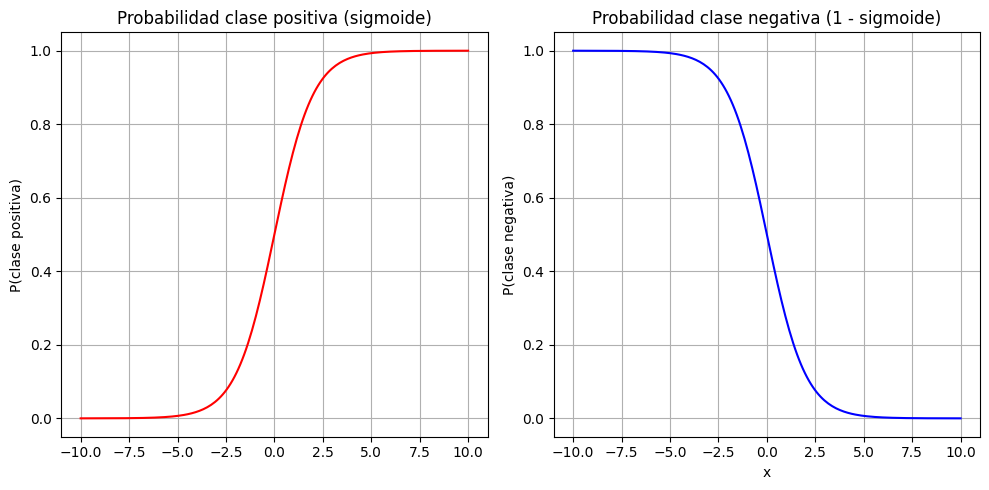

In [2]:
import numpy as np 
import matplotlib.pyplot as plt 

fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize=(10, 5), sharex=True) # crea una figura o lienzo con dos planos 

# Probabilidad clase positiva (sigmoide)
ax1.plot(x, y, color='red')
ax1.set_title('Probabilidad clase positiva (sigmoide)')
ax1.set_ylabel('P(clase positiva)')
ax1.grid(True)

# Probabilidad clase negativa (1 - sigmoide)
ax2.plot(x, 1 - y, color='blue')
ax2.set_title('Probabilidad clase negativa (1 - sigmoide)')
ax2.set_xlabel('x')
ax2.set_ylabel('P(clase negativa)')
ax2.grid(True)

plt.tight_layout()
plt.show()

# 2 Clasificación multilabel o multietiqueta 


Los MLPs también manejan fácilmente tareas de **clasificación binaria multilabel** (ver Capítulo 3). Decimos que la clasificación es multilabel o multetiqueta cuando las neuronas de salida son independientes.  

Por ejemplo, podrías tener un sistema que clasifique correos electrónicos prediciendo si son *spam* o no (*ham*), y al mismo tiempo determine si son *urgentes* o no.

<img src = 'spam_ham_urgent_no_urgent.png' width = 500>

 En este caso, necesitarías dos neuronas de salida, ambas con activación sigmoide:  
- La primera predeciría la probabilidad de que el correo sea *spam*.  
- La segunda, la probabilidad de que sea *urgente*.  



En general, se asigna una neurona de salida por cada etiqueta positiva. 

Nota que estas probabilidades **no necesariamente suman 1**, lo que permite al modelo combinar etiquetas libremente (por ejemplo, un correo podría ser *ham no urgente*, *spam urgente*, etc.).  


In [3]:
import numpy as np # vectores y matrices 
import pandas as pd # dataframes 
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier # 
from sklearn.metrics import classification_report


In [6]:

# 1. Crear dataset artificial: 1000 correos, 20 características
np.random.seed(42) # semilla aleatoria para reproducibilidad 
X = np.random.rand(1000, 20) # genera una matriz de orden d0 \times d1 con valores aleatorios entre 0 y 1
X.shape 

(1000, 20)

In [8]:

# Etiquetas: spam/ham (0=ham, 1=spam), urgent/no urgent (0=no, 1=urgent)
y_spam = np.random.randint(0, 2, size=1000)
y_urgent = np.random.randint(0, 2, size=1000)
y = np.column_stack([y_spam, y_urgent])
y.shape  

(1000, 2)

In [9]:

# 2. Dividir en train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [25]:
X_train.shape

(800, 20)

In [26]:

# 3. Configurar y entrenar MLP multietiqueta
mlp = MLPClassifier(hidden_layer_sizes=(20, 10), activation="tanh", max_iter=400, random_state=42)
mlp.fit(X_train, y_train)


c:\Users\marco\Documentos\investigacion\ml_intro\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:780: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


,hidden_layer_sizes,"(20, ...)"
,activation,'tanh'
,solver,'adam'
,alpha,0.0001
,batch_size,'auto'
,learning_rate,'constant'
,learning_rate_init,0.001
,power_t,0.5
,max_iter,400
,shuffle,True
,random_state,42


In [27]:

# 4. Medición del desempeño
y_pred = mlp.predict(X_test)
print(classification_report(y_test, y_pred, target_names=["spam", "urgent"]))

              precision    recall  f1-score   support

        spam       0.53      0.41      0.46       102
      urgent       0.47      0.44      0.45        93

   micro avg       0.50      0.43      0.46       195
   macro avg       0.50      0.43      0.46       195
weighted avg       0.50      0.43      0.46       195
 samples avg       0.34      0.32      0.31       195



c:\Users\marco\Documentos\investigacion\ml_intro\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\marco\Documentos\investigacion\ml_intro\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\marco\Documentos\investigacion\ml_intro\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in samples with no true nor predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(aver

# 3. Clasificación multiclase



Se da cuando las salidas son dependientes. 


Si cada instancia pertenece **solo a una clase** entre tres o más posibles (p. ej., clasificar dígitos del 0 al 9 en imágenes), se necesita una neurona de salida por clase y usar la función **softmax** en toda la capa de salida (Figura 10-9). 

$$ softmax(x) = \frac{ex}{\sum ex_{i}} = \frac{e^{x - \max(x)}}{\sum e^{x - \max(x)}} = \frac{1}{\sum e^{x - \max(x)}} e^{x - \max(x)} $$

donde $x$ es un vector de $n$ elementos. Por lo tanto, la función softmax es una función de activación que normaliza las salidas de una capa de salida para que sumen las probabilidades 1. 

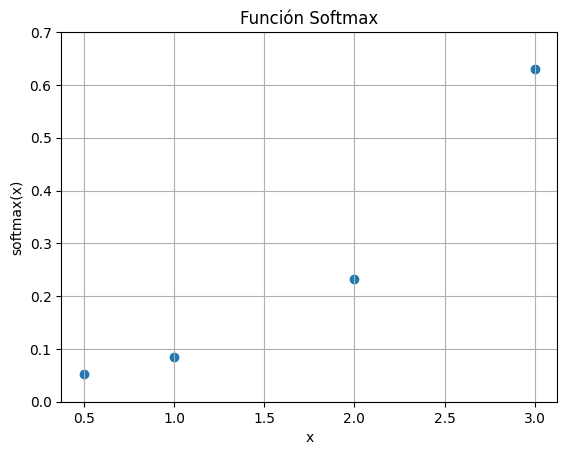

In [5]:
import numpy as np 
import matplotlib.pyplot as plt 

x = np.array([2, 3, 1, 0.5])

def softmax(x):
    e_x = np.exp(x - np.max(x))
    return e_x / e_x.sum()

y_softmax = softmax(x)

plt.scatter(x, y_softmax)
plt.title("Función Softmax")
plt.xlabel("x")
plt.ylabel("softmax(x)")
plt.grid(True)
plt.yticks(np.arange(0, 0.8, 0.1))
plt.show()

In [6]:
sum(y_softmax)

np.float64(1.0)

Softmax (presentada en el Capítulo 4) garantiza que las probabilidades estimadas estén entre 0 y 1 y sumen 1 (ya que las clases son excluyentes). Esto se llama **clasificación multiclase**.  


# Sobre la función de pérdida 


Respecto a la **función de pérdida**, como se predicen distribuciones de probabilidad, la **entropía cruzada** (*cross-entropy*, o *log loss*) suele ser la mejor opción (Capítulo 4).  

---


In [ ]:
import matplotlib.pyplot as plt

# Entropía cruzada binaria: -[y_true*log(y_pred) + (1-y_true)*log(1-y_pred)]
# Mostramos para y_true=1 (clase positiva) y y_true=0 (clase negativa)
y_pred = np.linspace(1e-6, 1-1e-6, 200) # una partición regular de (0,1] de 200 puntos. El 1e-6 es para evitar el log(0)
loss_pos = -np.log(y_pred)           # y_true = 1
loss_neg = -np.log(1 - y_pred)       # y_true = 0

plt.plot(y_pred, loss_pos, label="y_true = 1")
plt.plot(y_pred, loss_neg, label="y_true = 0")
plt.title("Entropía cruzada binaria (log loss)")
plt.xlabel("Predicción de probabilidad (y_pred)")
plt.ylabel("Pérdida (loss)")
plt.legend()
plt.grid(True)
plt.show()


* "El gráfico anterior muestra la función de pérdida de entropía cruzada binaria (log loss) para clasificación binaria. "
* "Las dos curvas representan la pérdida para la clase positiva (y_true=1) y la clase negativa (y_true=0) en función de la probabilidad predicha (y_pred). "
* "Interpretación:\n"
    * "- Cuando la predicción es correcta (y_pred cerca de 1 para y_true=1, o cerca de 0 para y_true=0), la pérdida es baja.\n"
    * "- Cuando la predicción es incorrecta (y_pred cerca de 0 para y_true=1, o cerca de 1 para y_true=0), la pérdida crece rápidamente.\n"
    * "Esto penaliza fuertemente las predicciones erróneas y motiva al modelo a asignar alta probabilidad a la clase correcta."



# **Implementación en Scikit-Learn**  


Scikit-Learn incluye la clase `MLPClassifier` (en `sklearn.neural_network`), casi idéntica a `MLPRegressor`, pero minimiza la entropía cruzada en lugar del MSE (error cuadrático medio). 

Pruébalo, por ejemplo, en el dataset *iris*: como es un problema casi lineal, basta con una capa de 5 a 10 neuronas (¡y escala las características!).  



La Tabla 10-2 resume la arquitectura típica de un MLP para clasificación:  

| **Hiperparámetro**         | **Clasificación binaria** | **Multilabel binaria**       | **Multiclase**               |
|----------------------------|---------------------------|-------------------------------|-------------------------------|
| Capas ocultas              | 1 a 5 (según complejidad) | 1 a 5                         | 1 a 5                         |
| Neuronas de salida         | 1                         | 1 por etiqueta binaria        | 1 por clase                   |
| Activación en salida       | Sigmoide                  | Sigmoide                      | Softmax                       |
| Función de pérdida         | Entropía cruzada (X-entropy) | Entropía cruzada             | Entropía cruzada              |

---



# **Consejo**  


Antes de continuar, te recomiendo hacer el **ejercicio 1** al final del capítulo.

Experimentarás con distintas arquitecturas de redes neuronales y visualizarás sus salidas en el [*TensorFlow Playground*](https://playground.tensorflow.org/#activation=tanh&batchSize=10&dataset=circle&regDataset=reg-plane&learningRate=0.03&regularizationRate=0&noise=0&networkShape=4,2&seed=0.00405&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false), lo que te ayudará a entender mejor los MLPs (efectos de capas, neuronas, funciones de activación, etc.).  



Ahora tienes todos los conceptos para implementar MLPs con **Keras**.  

--- 



### **Notas clave**  
- **Softmax** se usa para clasificación **multiclase excluyente** (probabilidades suman 1).  
- **Sigmoide** es para problemas **binarios** o **multilabel** (cada neurona actúa independientemente).  
- La **entropía cruzada** mide cómo de bien la red predice las probabilidades reales.  


# Ejemplo con el dataset de flores de iris Clasificación Multiclase 

In [ ]:
from sklearn.datasets import load_iris # obtener los datos 
from sklearn.model_selection import train_test_split # 
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report


In [ ]:

# Ejemplo con el dataset de flores de iris  
import pandas as pd 
# Cargar el dataset iris
iris = load_iris()
df_iris = pd.DataFrame(iris.data, columns = iris.feature_names)
df_iris['target'] = iris.target
df_iris.head() 


In [ ]:
X = iris.data # Obtener predictores 
y = iris.target # Obtener las etiquetas 


In [ ]:

# Escalar características con la técnica de estandarización 
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [ ]:

# Dividir en train/test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, \
    test_size=0.2, random_state=42)


In [ ]:

%%time 
# Crear y entrenar el MLP
mlp = MLPClassifier(hidden_layer_sizes=(10,), activation="relu", \
    max_iter=300, random_state=42)
mlp.fit(X_train, y_train)


In [ ]:

# Evaluar
y_pred = mlp.predict(X_test)
print(classification_report(y_test, y_pred, target_names=iris.target_names))

In [ ]:
#Gráfica de 30 instancias de testeo, el 20% de 150 instancias u observaciones 
import numpy as np

import matplotlib.pyplot as plt

# Visualización de la predicción vs real para el set de test
plt.figure(figsize=(10, 4))
plt.plot(y_test, 'o-', label='Real', color='tab:blue')
plt.plot(y_pred, 's--', label='Predicho', color='tab:orange')
plt.title('Clasificación multiclase: valores reales vs predichos (Iris)')
plt.xlabel('Índice de muestra')
plt.ylabel('Clase')
plt.yticks(np.unique(y_test), iris.target_names)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig(r"C:\Users\marco\Downloads\clasificacion_multiclase.png")
plt.show()

# Práctica de codificación con Python 

Aquí tienes un **diseño de práctica de codificación en Python** para aplicar los conceptos de clasificación con MLPs (Perceptrones Multicapa) usando `scikit-learn` y `TensorFlow/Keras`. La práctica cubre:  
- Clasificación binaria.  
- Clasificación multiclase.  
- Clasificación multilabel.  

---



### **Práctica: Clasificación con MLPs**

  
**Objetivos**:  
1. Implementar un MLP para clasificación binaria (ejemplo: spam/no spam).  
2. Extenderlo a multiclase (ejemplo: dígitos MNIST).  
3. Experimentar con clasificación multilabel (ejemplo: etiquetas múltiples).  



#### **Herramientas**:  
- Python 3.  
- Bibliotecas: `scikit-learn`, `TensorFlow/Keras`, `matplotlib`, `numpy`.  

---



### **Ejercicio 1: Clasificación Binaria (Spam/Ham)**  
**Dataset**: Usaremos el dataset de spam SMS (disponible en [Kaggle](https://www.kaggle.com/datasets/uciml/sms-spam-collection-dataset)).  


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report


In [ ]:

# 1. Cargar datos
data = pd.read_csv(r"C:\Users\marco\Documentos\investigacion\ml_intro\2_planificacion\redes_neuronales_geron\geron\10_chapter\datasets\spam.csv",\
    encoding="latin-1")[["v1", "v2"]]  # Etiqueta (v1) y texto (v2)
data.columns = ["label", "text"]
data.head() 

In [ ]:

# 2. Preprocesamiento: Convertir texto a vectores TF-IDF
vectorizer = TfidfVectorizer(max_features=1000)
X = vectorizer.fit_transform(data["text"])
y = (data["label"] == "spam").astype(int)  # Binario: 1 (spam), 0 (ham)


In [ ]:

# 3. Dividir en train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:

# 4. Crear y entrenar MLP
mlp = MLPClassifier(
    hidden_layer_sizes=(50,),  # 1 capa oculta con 50 neuronas
    activation="relu",
    solver="adam",
    max_iter=100,
    random_state=42
)
mlp.fit(X_train, y_train)


In [ ]:

# 5. Evaluar
y_pred = mlp.predict(X_test)
print(classification_report(y_test, y_pred))



**Salida esperada**:  
```
              precision  recall  f1-score  support
           0       0.98      1.00      0.99       965
           1       0.98      0.89      0.93       150
    accuracy                           0.98      1115
   macro avg       0.98      0.94      0.96      1115
weighted avg       0.98      0.98      0.98      1115
```

---

### **Ejercicio 2: Clasificación Multiclase (MNIST)**  
**Dataset**: Dígitos MNIST (incluido en `scikit-learn`).  


In [ ]:


from sklearn.datasets import load_digits
from sklearn.preprocessing import StandardScaler


In [ ]:

# 1. Cargar datos
digits = load_digits()
X = digits.data
y = digits.target


In [ ]:

# 2. Escalar características (¡importante para MLPs!)
scaler = StandardScaler()
X = scaler.fit_transform(X)


In [ ]:

# 3. Dividir datos
X_train, X_test, y_train, y_test = train_test_split(X, y, \
    test_size=0.2, random_state=42)


In [ ]:

# 4. MLP con softmax en salida (multiclase)
mlp = MLPClassifier(
    hidden_layer_sizes=(64, 32),  # 2 capas ocultas
    activation="relu",
    solver="adam",
    max_iter=500,
    random_state=42
)
mlp.fit(X_train, y_train)


In [ ]:

# 5. Evaluar
y_pred = mlp.predict(X_test)
print(classification_report(y_test, y_pred))




**Salida esperada**:  
```
              precision  recall  f1-score  support
           0       1.00      1.00      1.00        33
           1       0.97      1.00      0.99        34
           2       1.00      1.00      1.00        33
           3       1.00      0.98      0.99        41
           4       1.00      1.00      1.00        32
           5       0.96      0.98      0.97        46
           6       1.00      1.00      1.00        30
           7       0.98      0.98      0.98        41
           8       0.97      0.97      0.97        36
           9       0.98      0.95      0.96        40
    accuracy                           0.98       360
   macro avg       0.98      0.98      0.98       360
weighted avg       0.98      0.98      0.98       360
```

---

### **Ejercicio 3: Clasificación Multilabel (Keras)**  
**Dataset**: Synthetic (creamos datos con múltiples etiquetas).  


In [ ]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


In [ ]:

# 1. Datos sintéticos: 1000 muestras, 20 características, 3 etiquetas binarias
X = np.random.rand(1000, 20)
y = np.random.randint(0, 2, size=(1000, 3))  # 3 etiquetas independientes


In [ ]:

%%time 
# 2. MLP con Keras (salida sigmoide para multilabel)
model = Sequential([
    Dense(64, activation="relu", input_shape=(20,)),
    Dense(32, activation="relu"),
    Dense(3, activation="sigmoid")  # 3 neuronas de salida con sigmoide
])

model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])
model.fit(X, y, epochs=20, batch_size=32, validation_split=0.2)


In [ ]:

# 3. Predecir (probabilidades)
y_pred = model.predict(X[:5])
print("Predicciones (probabilidades):\n", y_pred)




**Salida esperada**:  
```
Predicciones (probabilidades):
 [[0.78 0.12 0.95]
 [0.34 0.89 0.23]
 [0.56 0.45 0.67]
 [0.91 0.09 0.82]
 [0.23 0.76 0.31]]
```

---



### **Preguntas para Reflexionar**:  
1. ¿Cómo afecta el número de capas/neuronas al rendimiento? Prueba con `hidden_layer_sizes=(10,)` vs `(100, 50)`.  
2. ¿Qué pasa si usas `activation="tanh"` en lugar de `"relu"`?  
3. Para el ejercicio multilabel, ¿por qué usamos `binary_crossentropy` en lugar de `categorical_crossentropy`?  



### **Extensión Opcional**:  
- Implementa el mismo ejercicio con `TensorFlow/Keras` para los datasets de spam y MNIST.  
- Visualiza las predicciones incorrectas con matplotlib.  



¡Espero que esta práctica te ayude a consolidar los conceptos! Si necesitas más detalles o ajustes, dime.

# Referentes actuales en Deep Learning 

Aquí tienes una selección de **10 referentes actualizados sobre Deep Learning** (posteriores a la 3ª edición de Aurélien Géron en 2022) para enriquecer tu docencia universitaria en ciencia de datos con Python. Estos recursos combinan fundamentos teóricos, aplicaciones prácticas y enfoques innovadores:

---



### **1. François Chollet**  
- **Libro**: *Deep Learning with Python* (2ª ed., 2021)   
  - Enfoque en Keras/TensorFlow, ideal para enseñanza por su claridad y ejemplos de visión por computador y NLP.  
  - Actualización clave: Incluye transformers y técnicas modernas de optimización.  



### **2. Jeremy Howard & Sylvain Gugger**  
- **Libro**: *Deep Learning for Coders with Fastai & PyTorch* (2020)   
  - Revolucionario por su enfoque práctico con Fastai (basado en PyTorch).  
  - Cubre desde CNN hasta modelos generativos, con notebooks ejecutables.  



### **3. Ian Goodfellow, Yoshua Bengio & Aaron Courville**  
- **Libro**: *Deep Learning* (2ª ed., esperada en 2024)   
  - Referencia clásica actualizada con avances en GANs, RL y ética en IA.  
  - Ideal para fundamentos matemáticos rigurosos.  

### **4. Lewis Tunstall, Leandro von Werra & Thomas Wolf**  
- **Libro**: *Natural Language Processing with Transformers* (2022)   
  - Enfoque en NLP moderno (BERT, GPT, etc.) usando Hugging Face.  
  - Incluye código en PyTorch y TensorFlow.  

### **5. Kevin Murphy**  
- **Libro**: *Probabilistic Machine Learning: Advanced Topics* (2023)   
  - Profundiza en modelos probabilísticos y Bayesian Deep Learning.  
  - Complemento ideal para cursos avanzados.  

### **6. Sebastian Raschka & Vahid Mirjalili**  
- **Libro**: *Machine Learning with PyTorch and Scikit-Learn* (2022)   
  - Actualización de su clásico, ahora integrando PyTorch.  
  - Cubre desde fundamentos hasta arquitecturas profundas.  

### **7. Andrew Trask**  
- **Libro**: *Grokking Deep Learning* (2023)  
  - Enfoque visual e intuitivo, ideal para estudiantes sin base matemática fuerte.  
  - Implementaciones desde cero en Python.  

### **8. Chip Huyen**  
- **Libro**: *Designing Machine Learning Systems* (2022)   
  - Enseña a llevar modelos a producción (MLOps), clave para docencia aplicada.  
  - Incluye estudios de caso con TensorFlow Extended (TFX).  



### **9. Alfredo Canziani & Yann LeCun**  
- **Recurso**: *NYU Deep Learning Course* (2023, disponible en GitHub)  
  - Materiales abiertos con PyTorch, enfocados en investigación y aplicaciones.  
  - Incluye videos y ejercicios actualizados.  

### **10. Aurélien Géron (actualización indirecta)**  
- **Curso**: *TensorFlow Developer Certificate Program* (2023)  
  - Aunque no es un libro, su contenido en Coursera actualiza prácticas con TF 2.x.  

---



### **Criterios de selección**:  
- **Enfoque práctico**: Todos incluyen código en Python (PyTorch/Keras/TensorFlow) .  
- **Temas modernos**: Transformers, MLOps, modelos probabilísticos .  
- **Niveles variados**: Desde introductorios (Fastai) hasta avanzados (Murphy).  



### **Recomendación adicional**:  
Para cursos introductorios, combina *Chollet* (Keras) con *Howard* (Fastai). Para avanzados, *Murphy* y *Tunstall* ofrecen profundidad teórica y técnica .  



Si necesitas detalles sobre un autor en particular o materiales complementarios (como datasets o notebooks), ¡avísame!